In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib import style
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates

style.use('ggplot')

epl = pd.read_csv('~/Documents/datasets/E0.csv',index_col=1)

In [2]:
epl.columns


Index(['Div', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG',
       'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC',
       'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA',
       'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD', 'PSA', 'WHH',
       'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'Bb1X2', 'BbMxH', 'BbAvH', 'BbMxD',
       'BbAvD', 'BbMxA', 'BbAvA', 'BbOU', 'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5',
       'BbAv<2.5', 'BbAH', 'BbAHh', 'BbMxAHH', 'BbAvAHH', 'BbMxAHA', 'BbAvAHA',
       'PSCH', 'PSCD', 'PSCA'],
      dtype='object')

In [3]:
columns = [ 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG',
       'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC',
       'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A']
data = epl[columns]

In [4]:
data.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,...,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A
Date,,,,,,,,,,,,,,,,,,,,,
11/08/17,Arsenal,Leicester,4,3,H,2,2,D,27,6,...,12,9,4,0,1,0,0,1.53,4.5,6.50
12/08/17,Brighton,Man City,0,2,A,0,0,D,6,14,...,9,3,10,0,2,0,0,11.00,5.5,1.33
12/08/17,Chelsea,Burnley,2,3,A,0,3,A,19,10,...,11,8,5,3,3,2,0,1.25,6.5,15.00
12/08/17,Crystal Palace,Huddersfield,0,3,A,0,2,A,14,8,...,19,12,9,1,3,0,0,1.83,3.6,5.00
12/08/17,Everton,Stoke,1,0,H,1,0,H,9,9,...,10,6,7,1,1,0,0,1.70,3.8,5.75


In [5]:
data.isnull().sum()
cat_features = ['HomeTeam','AwayTeam','FTR','HTR']
num_features = ['FTHG', 'FTAG', 'HTHG', 'HTAG',
     'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC',
       'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A']
drop_features = ['FTHG', 'FTAG','HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC','HY', 'AY', 'HR', 'AR']

In [6]:
data.head(20)

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,...,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A
Date,,,,,,,,,,,,,,,,,,,,,
11/08/17,Arsenal,Leicester,4,3,H,2,2,D,27,6,...,12,9,4,0,1,0,0,1.53,4.50,6.50
12/08/17,Brighton,Man City,0,2,A,0,0,D,6,14,...,9,3,10,0,2,0,0,11.00,5.50,1.33
12/08/17,Chelsea,Burnley,2,3,A,0,3,A,19,10,...,11,8,5,3,3,2,0,1.25,6.50,15.00
12/08/17,Crystal Palace,Huddersfield,0,3,A,0,2,A,14,8,...,19,12,9,1,3,0,0,1.83,3.60,5.00
12/08/17,Everton,Stoke,1,0,H,1,0,H,9,9,...,10,6,7,1,1,0,0,1.70,3.80,5.75
12/08/17,Southampton,Swansea,0,0,D,0,0,D,29,4,...,13,13,0,2,1,0,0,1.62,4.00,6.50
12/08/17,Watford,Liverpool,3,3,D,2,1,H,9,14,...,8,3,3,0,3,0,0,6.00,4.20,1.62
12/08/17,West Brom,Bournemouth,1,0,H,1,0,H,16,9,...,3,8,2,3,1,0,0,2.40,3.30,3.30
13/08/17,Man United,West Ham,4,0,H,1,0,H,22,9,...,7,11,1,2,2,0,0,1.30,5.75,12.00


In [7]:
arsenal = data.loc[(data['HomeTeam'] == 'Arsenal') | (data['AwayTeam'] == 'Arsenal')]
manutd = data.loc[(data['HomeTeam'] == 'Man United') | (data['AwayTeam'] == 'Man United')]
liverpool = data.loc[(data['HomeTeam'] == 'Liverpool') | (data['AwayTeam'] == 'Liverpool')]

In [8]:
liverpool.tail(20)

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,...,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A
Date,,,,,,,,,,,,,,,,,,,,,
22/12/17,Arsenal,Liverpool,3,3,D,0,1,A,11,14,...,11,7,8,1,0,0,0,2.54,3.60,2.79
26/12/17,Liverpool,Swansea,5,0,H,1,0,H,22,7,...,8,4,2,0,1,0,0,1.16,9.00,19.00
30/12/17,Liverpool,Leicester,2,1,H,0,1,A,17,7,...,3,7,1,3,2,0,0,1.30,6.00,11.00
01/01/18,Burnley,Liverpool,1,2,A,0,0,D,13,19,...,12,3,9,0,0,0,0,7.50,4.50,1.50
14/01/18,Liverpool,Man City,4,3,H,1,1,D,16,11,...,7,5,6,2,3,0,0,3.10,3.75,2.29
22/01/18,Swansea,Liverpool,1,0,H,1,0,H,3,21,...,9,3,9,0,2,0,0,12.00,5.75,1.30
30/01/18,Huddersfield,Liverpool,0,3,A,0,2,A,5,14,...,8,1,4,0,0,0,0,12.00,5.75,1.30
04/02/18,Liverpool,Tottenham,2,2,D,1,0,H,9,13,...,9,3,7,3,1,0,0,2.10,3.75,3.60
11/02/18,Southampton,Liverpool,0,2,A,0,2,A,6,16,...,8,3,1,1,2,0,0,4.20,3.79,1.80


In [9]:
manutd.tail(20)

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,...,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A
Date,,,,,,,,,,,,,,,,,,,,,
23/12/17,Leicester,Man United,2,2,D,1,1,D,11,19,...,8,4,6,2,2,1,0,4.50,3.60,1.90
26/12/17,Man United,Burnley,2,2,D,0,2,A,23,3,...,14,12,2,3,7,0,0,1.25,6.50,15.00
30/12/17,Man United,Southampton,0,0,D,0,0,D,15,8,...,13,10,7,2,4,0,0,1.36,5.50,9.00
01/01/18,Everton,Man United,0,2,A,0,0,D,12,21,...,10,6,6,2,0,0,0,5.50,3.50,1.80
15/01/18,Man United,Stoke,3,0,H,2,0,H,20,11,...,10,6,1,2,1,0,0,1.22,7.00,15.00
20/01/18,Burnley,Man United,0,1,A,0,0,D,13,12,...,12,5,4,3,3,0,0,7.50,3.89,1.57
31/01/18,Tottenham,Man United,2,0,H,2,0,H,22,6,...,13,6,3,2,2,0,0,2.35,3.29,3.39
03/02/18,Man United,Huddersfield,2,0,H,0,0,D,16,4,...,19,5,2,2,4,0,0,1.16,8.50,19.00
11/02/18,Newcastle,Man United,1,0,H,0,0,D,10,13,...,15,0,10,0,2,0,0,5.50,3.75,1.61


In [10]:
equal_odds = data.loc[(data['B365H'] == data['B365A'])]
equal_odds = data.loc[(data['B365H'] == data['B365A'])]
draws = data.loc[(data['FTR'] == 'D')]
favoured_team_home = data.loc[(data['B365H'] < data['B365A'])]
favoured_team_away = data.loc[(data['B365H'] > data['B365A'])]

''' 
Let's investigate the nine possibilities in a game i.e 

HH,HD,HA,
DH,DD,DA,
AH,AD,AA
'''
# Win half time for home team, win full time for home team
HH = data.loc[(data['HTR'] == 'H') & (data['FTR'] == 'H')]

# Win half time for home team, draw full time 
HD = data.loc[(data['HTR'] == 'H') & (data['FTR'] == 'D')]

# Win half time for home team, win full time for away team
HA = data.loc[(data['HTR'] == 'H') & (data['FTR'] == 'A')]


# Draw half time, win full time for home team
DH = data.loc[(data['HTR'] == 'D') & (data['FTR'] == 'H')]

# Draw half time , draw full time 
DD = data.loc[(data['HTR'] == 'D') & (data['FTR'] == 'D')]


# Draw half time, win full time for away team
DA = data.loc[(data['HTR'] == 'D') & (data['FTR'] == 'A')]

# Win half time for away team, win full time for home team
AH = data.loc[(data['HTR'] == 'A') & (data['FTR'] == 'H')]

# Win half time for away team, draw full time
AD = data.loc[(data['HTR'] == 'A') & (data['FTR'] == 'D')]

# Win half time for home team, win full time for home team
AA = data.loc[(data['HTR'] == 'A') & (data['FTR'] == 'A')]



In [11]:
equal_odds

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,...,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A
Date,,,,,,,,,,,,,,,,,,,,,
14/10/17,Liverpool,Man United,0,0,D,0,0,D,19,6,...,13,7,3,0,2,0,0,2.80,3.25,2.80
25/11/17,Swansea,Bournemouth,0,0,D,0,0,D,10,9,...,6,4,5,4,2,0,0,2.79,3.25,2.79
03/01/18,Arsenal,Chelsea,2,2,D,0,0,D,14,19,...,11,10,8,3,2,0,0,2.60,3.39,2.60
10/03/18,Man United,Liverpool,2,1,H,2,0,H,5,14,...,16,1,13,2,1,0,0,2.75,3.39,2.75
10/03/18,Newcastle,Southampton,3,0,H,2,0,H,7,6,...,10,2,6,0,2,0,0,2.79,3.20,2.79


In [12]:
draws.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,...,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A
Date,,,,,,,,,,,,,,,,,,,,,
12/08/17,Southampton,Swansea,0,0,D,0,0,D,29,4,...,13,13,0,2,1,0,0,1.62,4.00,6.50
12/08/17,Watford,Liverpool,3,3,D,2,1,H,9,14,...,8,3,3,0,3,0,0,6.00,4.20,1.62
21/08/17,Man City,Everton,1,1,D,0,1,A,19,7,...,9,7,1,1,2,1,1,1.33,5.75,10.00
26/08/17,Huddersfield,Southampton,0,0,D,0,0,D,16,6,...,10,5,4,0,1,0,0,3.90,3.40,2.10
26/08/17,Watford,Brighton,0,0,D,0,0,D,8,16,...,18,3,11,0,1,1,0,1.91,3.40,4.00


In [13]:
data.shape

(380, 23)

In [14]:
favoured_team_home.head(10)

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,...,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A
Date,,,,,,,,,,,,,,,,,,,,,
11/08/17,Arsenal,Leicester,4,3,H,2,2,D,27,6,...,12,9,4,0,1,0,0,1.53,4.50,6.50
12/08/17,Chelsea,Burnley,2,3,A,0,3,A,19,10,...,11,8,5,3,3,2,0,1.25,6.50,15.00
12/08/17,Crystal Palace,Huddersfield,0,3,A,0,2,A,14,8,...,19,12,9,1,3,0,0,1.83,3.60,5.00
12/08/17,Everton,Stoke,1,0,H,1,0,H,9,9,...,10,6,7,1,1,0,0,1.70,3.80,5.75
12/08/17,Southampton,Swansea,0,0,D,0,0,D,29,4,...,13,13,0,2,1,0,0,1.62,4.00,6.50
12/08/17,West Brom,Bournemouth,1,0,H,1,0,H,16,9,...,3,8,2,3,1,0,0,2.40,3.30,3.30
13/08/17,Man United,West Ham,4,0,H,1,0,H,22,9,...,7,11,1,2,2,0,0,1.30,5.75,12.00
19/08/17,Bournemouth,Watford,0,2,A,0,0,D,6,19,...,14,8,5,1,3,0,0,2.00,3.60,4.00
19/08/17,Burnley,West Brom,0,1,A,0,0,D,20,8,...,11,5,5,1,0,0,1,2.63,3.20,3.00


In [15]:
favoured_team_away.tail(10)

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,...,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A
Date,,,,,,,,,,,,,,,,,,,,,
29/04/18,West Ham,Man City,1,4,A,1,2,A,4,19,...,11,0,7,0,1,0,0,10.00,5.75,1.33
04/05/18,Brighton,Man United,1,0,H,0,0,D,11,16,...,3,5,6,2,0,0,0,4.75,3.60,1.85
05/05/18,Everton,Southampton,1,1,D,0,0,D,9,11,...,12,3,4,2,4,0,1,2.89,3.29,2.62
05/05/18,West Brom,Tottenham,1,0,H,0,0,D,9,18,...,12,5,9,4,1,0,0,8.00,4.75,1.44
08/05/18,Swansea,Southampton,0,1,A,0,0,D,11,13,...,15,7,6,2,1,0,0,3.10,3.25,2.54
09/05/18,Leicester,Arsenal,3,1,H,1,0,H,19,14,...,12,6,6,2,2,0,1,3.75,3.79,2.00
10/05/18,West Ham,Man United,0,0,D,0,0,D,9,16,...,12,1,6,1,1,0,0,4.75,3.79,1.80
13/05/18,Huddersfield,Arsenal,0,1,A,0,1,A,18,9,...,7,7,4,1,0,0,0,6.00,4.33,1.60
13/05/18,Newcastle,Chelsea,3,0,H,1,0,H,16,6,...,10,4,2,0,1,0,0,6.50,4.20,1.60


In [16]:
HH.shape

(103, 23)

In [17]:
HD.shape

(12, 23)

In [18]:
HA.shape

(9, 23)

In [19]:
DH.shape

(61, 23)

In [20]:
DD.shape

(67, 23)

In [21]:
DA.shape

(34, 23)

In [22]:
AH.shape

(9, 23)

In [23]:
AD.shape
AD

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,...,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A
Date,,,,,,,,,,,,,,,,,,,,,
21/08/17,Man City,Everton,1,1,D,0,1,A,19,7,...,9,7,1,1,2,1,1,1.33,5.75,10.00
14/10/17,Burnley,West Ham,1,1,D,0,1,A,20,8,...,14,7,4,2,2,0,1,2.75,3.25,2.80
15/10/17,Southampton,Newcastle,2,2,D,0,1,A,12,19,...,12,3,8,1,2,0,0,1.91,3.60,4.50
28/10/17,Crystal Palace,West Ham,2,2,D,0,2,A,19,6,...,15,11,2,1,2,0,0,2.39,3.29,3.29
29/10/17,Brighton,Southampton,1,1,D,0,1,A,7,6,...,10,2,7,3,1,0,0,3.29,3.20,2.45
20/11/17,Brighton,Stoke,2,2,D,1,2,A,9,13,...,5,6,7,1,0,0,0,2.39,3.20,3.39
25/11/17,Tottenham,West Brom,1,1,D,0,1,A,24,5,...,13,8,0,1,4,0,0,1.25,6.00,16.00
22/12/17,Arsenal,Liverpool,3,3,D,0,1,A,11,14,...,11,7,8,1,0,0,0,2.54,3.60,2.79
26/12/17,Man United,Burnley,2,2,D,0,2,A,23,3,...,14,12,2,3,7,0,0,1.25,6.50,15.00


In [24]:
AA.shape

(65, 23)

/home/saazi/ml/env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


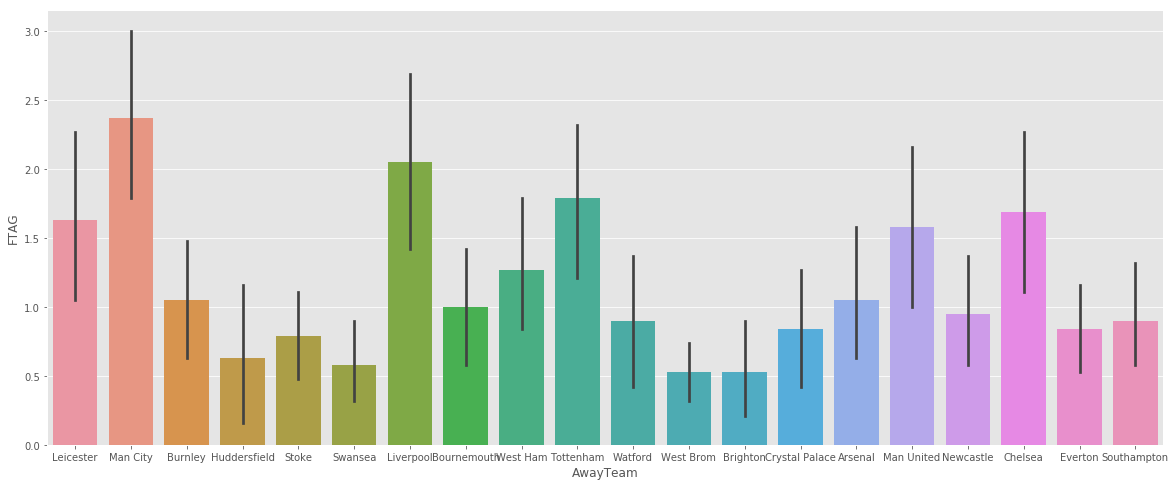

In [25]:
plt.figure(figsize=(20,8))

sns.barplot(x="AwayTeam", y="FTAG", data=data)
plt.show()

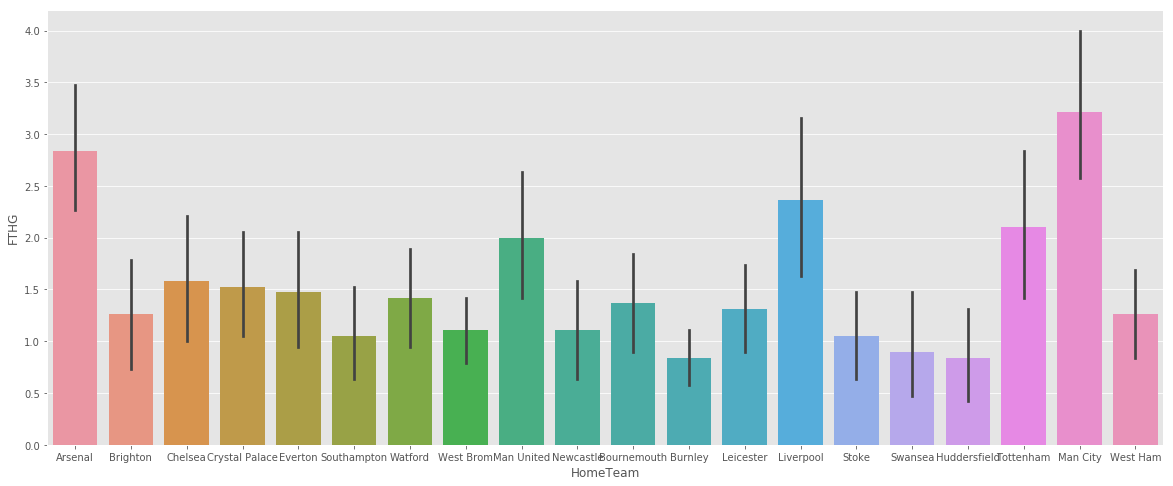

In [26]:
plt.figure(figsize=(20,8))

sns.barplot(x="HomeTeam", y="FTHG", data=data)
plt.show()

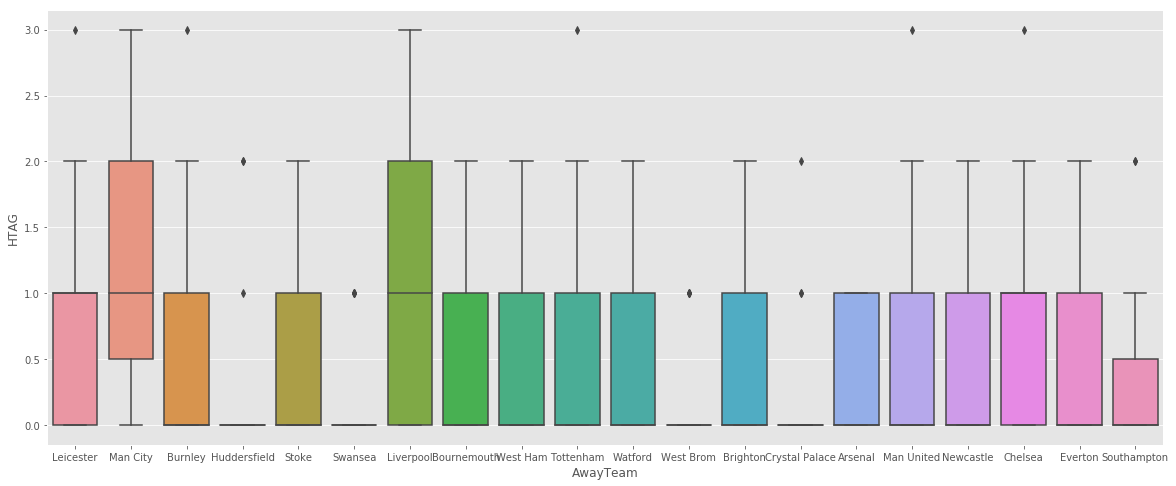

In [27]:
plt.figure(figsize=(20,8))

sns.boxplot(x="AwayTeam", y="HTAG", data=data)
plt.show()

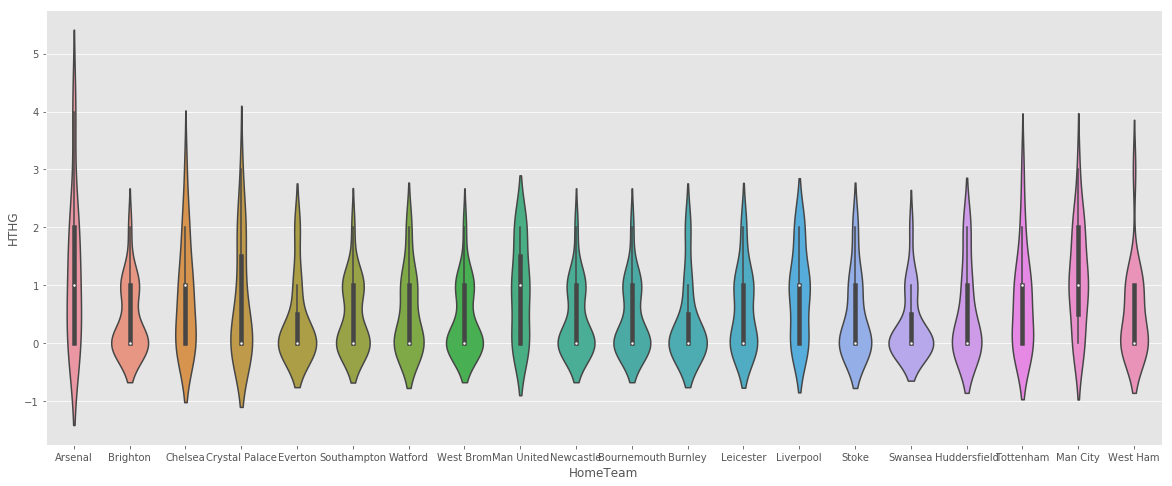

In [28]:
plt.figure(figsize=(20,8))

sns.violinplot(x="HomeTeam", y="HTHG", data=data)
plt.show()

In [29]:
arsenal_home = data.loc[(data['HomeTeam'] == 'Arsenal')]

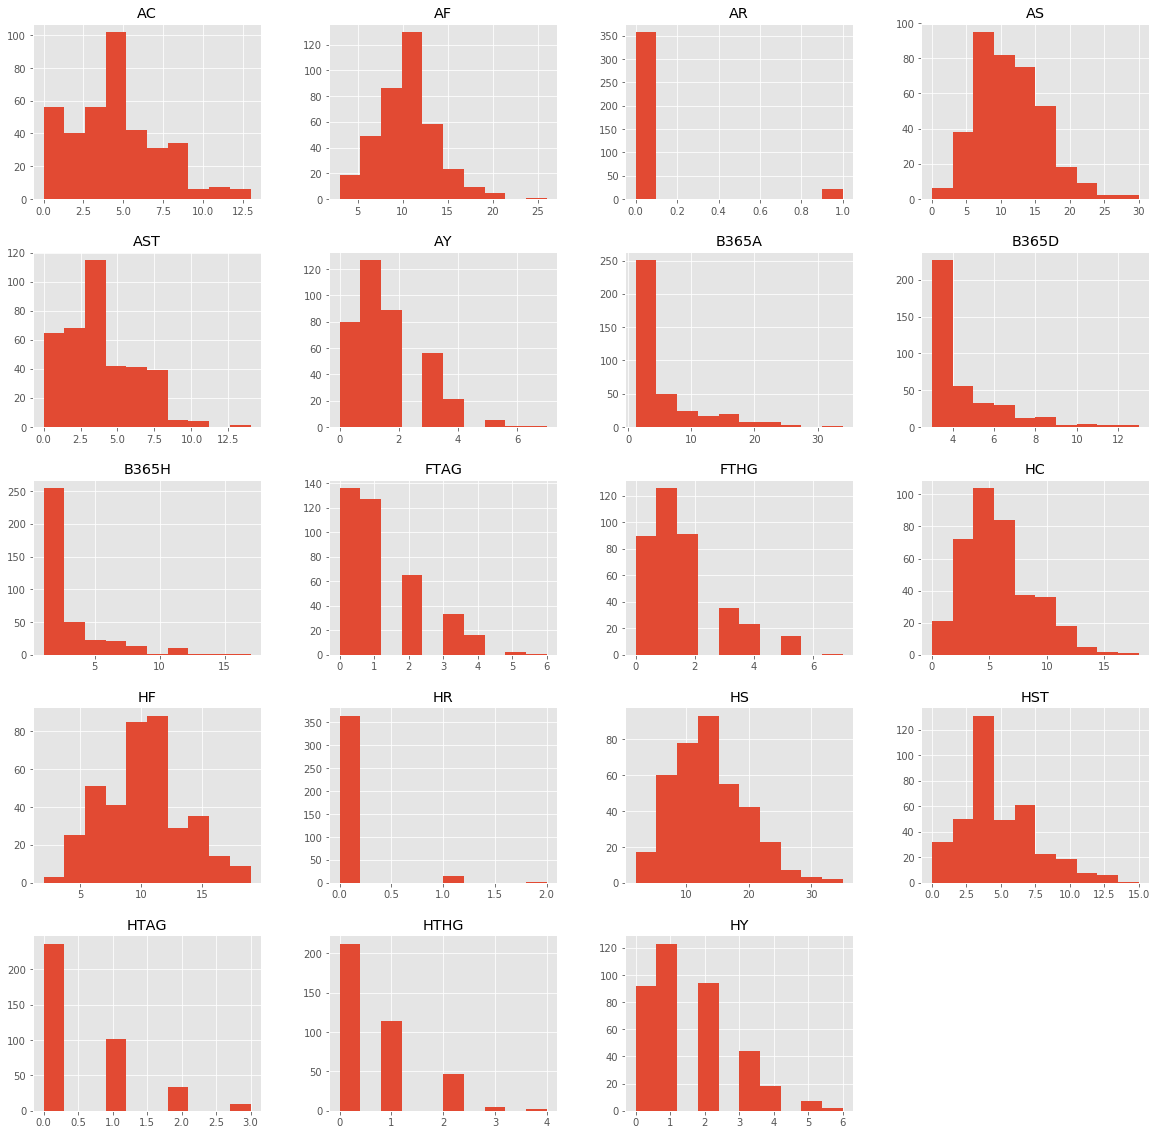

In [30]:
# plot histogram for each parameter
data[num_features].hist(figsize=(20,20))
plt.show()


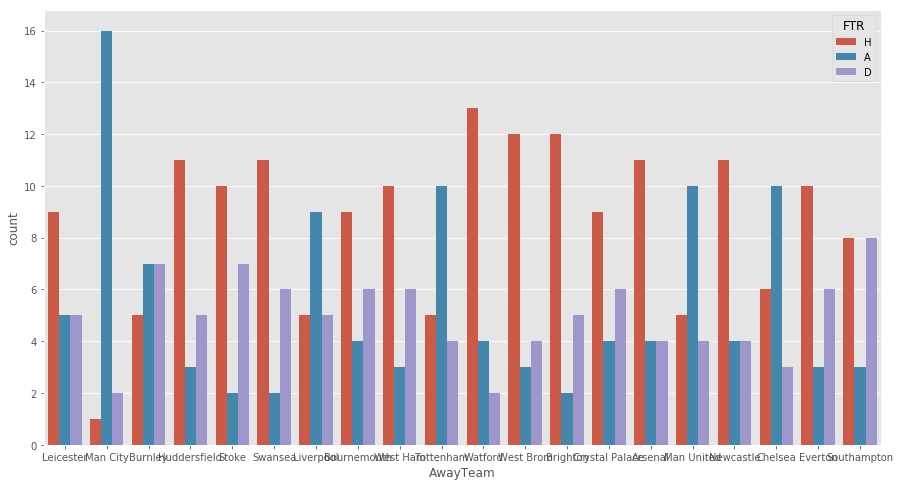

In [31]:
# Home record of teams at full time
plt.figure(figsize=(15,8))
sns.countplot(x="AwayTeam",hue= 'FTR',data=data)
#show the plot
plt.show()


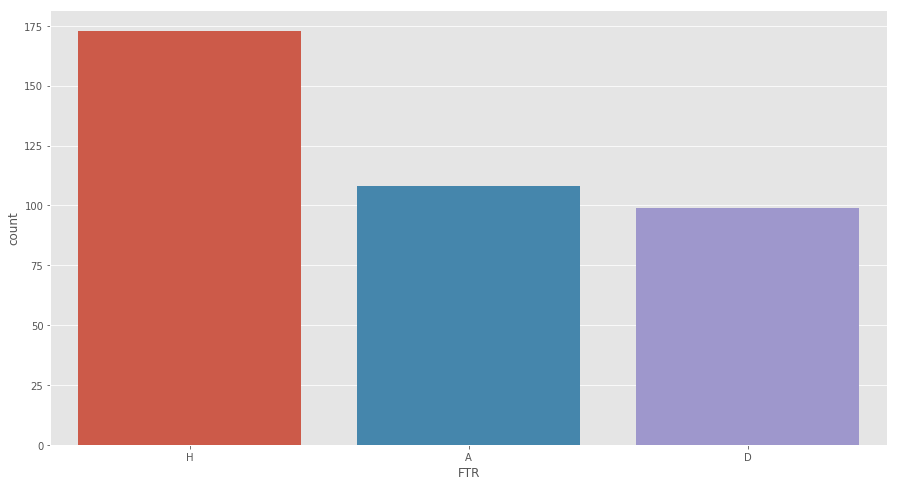

In [32]:
# Away record of teams at full time
plt.figure(figsize=(15,8))
sns.countplot(x="FTR",data=data)
#show the plot
plt.show()


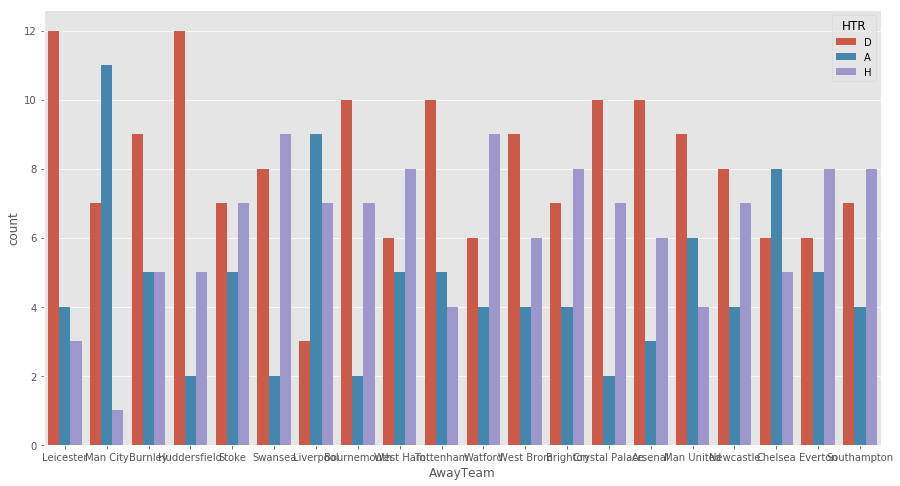

In [33]:
# Home record of teams at half time
plt.figure(figsize=(15,8))
sns.countplot(x="AwayTeam",hue= 'HTR',data=data)
#show the plot
plt.show()


In [34]:
'''
You'll realise here that the classifier performed better when 
we added more features to the pipeline !!!
'''
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer

encoder = LabelEncoder()
# custom multicolumn transformer for categorical variables

class MultiColumnLabelEncoder:
    def __init__(self, columns = None):
        self.columns = columns # array of column names to encode
        
    def fit(self, X,y=None):
        return self # not relevant
    def transform(self, X):
        ''' 
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all columns in X
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
             for colname,col in enumerate(output):
                output[colname] = LabelEncoder().fit_transform(col)
        
        return output
    
    def fit_transform(self, X ,y=None):
        return self.fit(X,y).transform(X)
    
'''You can also use the above class as shown in the line below '''
#MultiColumnLabelEncoder(columns = cat_attributes).fit_transform(olympics)
                    
''' Custom function to sort categorical and numerical columns 
into separate lists to be processed by the pipeline
'''
def column_types(df):
    cat_cols = []
    num_cols = []
    
    for y in df.columns:
        if (df[y].dtype == object):
            cat_cols.append(y)
        else:
            num_cols.append(y)
    
    return cat_cols, num_cols

class DataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.attribute_names].values

class MyLabelBinarizer():
    def __init__(self, *args, **kwargs):
        self.encoder = LabelBinarizer( *args, **kwargs)
    def fit(self, x, y = 0):
        self.encoder.fit(x)
        return self
    def transform(self,x, y=0):
        return self.encoder.transform(x)

X_all = data.drop("FTR",1)
y_all = data["FTR"]

cat_attributes ,num_attributes = column_types(X_all)

num_pipeline = Pipeline([
    ('selector',DataFrameSelector(num_attributes)),
    ('std_scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('selector',DataFrameSelector(cat_attributes)),
    ('label_encoder', MultiColumnLabelEncoder())
]) 

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
])

prepared = full_pipeline.fit_transform(X_all)

#labels = data["FTR"]

X_train, X_test, y_train ,y_test = train_test_split(prepared, y_all, random_state= 0)
forest = RandomForestClassifier(n_jobs=-1,max_depth=10,n_estimators=1000, random_state=0)
forest.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [35]:
# Predicting the Test set results
y_pred = forest.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)

In [37]:
accuracy

0.9157894736842105

In [38]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'max_depth': [1, 10, 100, 500], 'n_estimators': [10,50,200,365,1000]}]
grid_search = GridSearchCV(estimator = forest,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)


/home/saazi/ml/env/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [39]:
accuracy = grid_search.best_score_


In [40]:
accuracy

0.9263157894736842

In [41]:
grid_search.best_params_

{'max_depth': 100, 'n_estimators': 1000}

In [42]:
#label_rf = forest.predict(X_test)
print('Accuracy on the training subset: {:3f}'.format(forest.score(X_train, y_train)))
print('Accuracy on the testing subset: {:3f}'.format(forest.score(X_test, y_test)))


Accuracy on the training subset: 1.000000
Accuracy on the testing subset: 0.915789


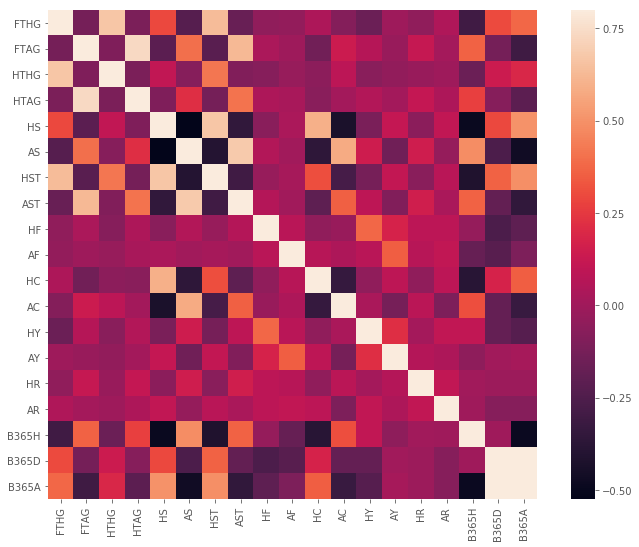

In [43]:
corrmat = data[num_features].corr()
fig = plt.figure(figsize=(12,9))

sns.heatmap(corrmat, vmax = .8,square = True)
plt.show()

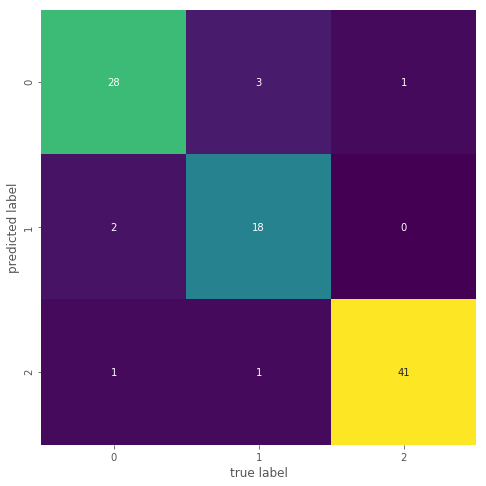

In [44]:
# Creating confusin matrix and heat map
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15,8))
sns.heatmap(mat.T, square=True, annot=True, fmt='d',cbar=False,cmap='viridis')

#Plotting heatmap of Confusion Matrix
plt.xlabel('true label')
plt.ylabel('predicted label');